# 1.7 方波輸入RC電路、箝位電路

## 電容充放電公式 - 1
1. 充電公式  
    $V_c (t) = E(1-e^{-\frac{t}{\tau}})$  
2. 放電公式  
    $V_c (t) = Ee^{-\frac{t}{\tau}}$
    
    
3. 充放電一體公式，以時間0為參考點，中途電源電壓無變化。     
    $V_c (t) = V_c(0) + (E_i (t) - V_c(0))(1-e^{-\frac{t}{\tau}})$    -- 以0為時間參考點  
    $V_c (t) = V_c(t_0) + (E_i (t) - V_c(0))(1-e^{-\frac{t-t_0}{\tau}})$   -- $以t_0為時間參考點$
    
    $V_c(0)$: 時間0時，電容上的電壓  
    $E_i (t)$:  時間t時的電源電壓
    
    令$V_c(0)=0，E_i (t)=E$，可得1式。  
    令$V_c(0)=E，E_i (t)=0$，可得2式。
    
    


### 練習: 如下圖，若電路已達穩態，當t = 0時，開關S由1到2，則 Vc的表示式為何？ (91統測)

<img align="center" style="padding-right:10px;" src="figures\RC_circuit3.png">



## 參考解答  

### 解題步驟  

    電容充放電公式  
1. $V_c (t) = V_c(0) + (E_i (t) - V_c(0))(1-e^{-\frac{t}{\tau}})$  -- 

    依題意，當t = 0時，開關S由1到2時  
2. $V_c (0) = 100， E_i (t) = -50 ，\tau = RC = 5ms $ 

    將2式代入1式得  
3. $V_c (t) = 100 + (-50 - 100)(1-e^{-200t})$

    化簡上式得  
4. $V_c (t) = -50 + 150e^{-200t}$

## 練習 

### 1.印出上圖電路的時間常數  
### 2.畫出上圖電路電阻與電容上的電壓波形。

#### 提示: 時間範圍0~50ms，分成200等份。

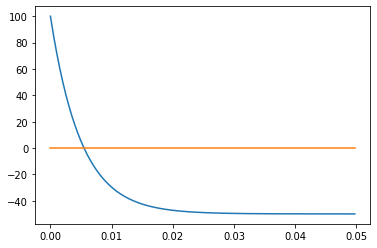

In [16]:
import math
import matplotlib.pyplot as plt

R = 500
C = 10E-6
tau = R * C

Vc0 = 100
E = -50
N = 200
dt = 50E-3 / N
T = [i*dt for i in range(N)]
Vc = [-50+150*math.exp(-200*t) for t in T]
#VR = [0 for t in T] #此處需修正
VR = [0 for vc in Vc] #此處需修正

plt.plot(T,Vc, T,VR)

# 練習: 如下圖，配合下列條件，寫出電路中電阻與電容上的電壓波形表示式。 
### 1.當t = 0時，電容上的初始電壓為0 ，且電容開始充電。  
### 2.當t = 50ms時，開關S由1到2，電容負向充電。  

<img align="center" style="padding-right:10px;" src="figures\RC_circuit3.png">


當t < 50ms時   
1. $V_c (t) = V_c(0) + (E_i (t) - V_c(0))(1-e^{-\frac{t}{\tau}})$  
2. $V_R (t)$

當t > 50ms時  


# 練習: 如上圖，配合下列條，件繪出電路電阻與電容上的電壓波形。 
### 1.當t = 0時，電容上的初始電壓為0 ，且電容開始充電。  
### 2.當t = 50ms時，開關S由1到2，電容負向充電。  

#### 提示: 時間範圍0~100ms，分成200等份。

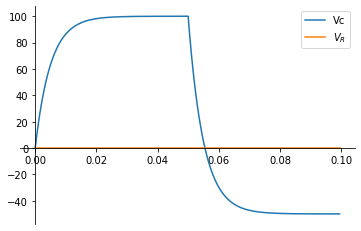

In [5]:
import math
import matplotlib.pyplot as plt

R = 500
C = 10E-6
tau = R * C

#原始參數設定
Vc0 = 0
E = 100
t0 = 0

N = 200
dt = 100E-3 / N
T = []
Vc = []
VR = []

needUpdate=True  #參數更正用

for i in range(N):
    t = i*dt
    T.append(t)
    if t>=50E-3 and needUpdate == True:
        Vc0 = Vc[i-1]
        E = -50
        t0 = i*dt
        needUpdate = False  #已更正完參數       
    
    vc = Vc0 + (E - Vc0)*(1-math.exp(-200*(t-t0)))
    vr = 0
    Vc.append(vc)
    VR.append(vr)    
    
fig, ax = plt.subplots()
ax.plot(T,Vc,label='Vc')
ax.plot(T,VR,label=r'$V_R$')
ax.legend()

ax.spines['left'].set_position('zero')   # makee x and y axes go through
ax.spines['bottom'].set_position('zero') # the origin
ax.spines['right'].set_color('none')     # hide the unnecessary
ax.spines['top'].set_color('none')       # spines ("the box" around the plot)
    


## 重做上題，當t = 10ms時，開關S由1到2，電容負向充電。

# 電容充放電公式 - 2

4.  充放電一體公式 -- 以時間$t_{n-1}$為參考點，電源電壓可變化。   
    $V_c (t_n) = V_c(t_{n-1}) + (E_i (t_{n}) - V_c(t_{n-1}))(1-e^{-\frac{t_{n} - t_{n+1}}{\tau}})$  
    
    $\Delta$:最小時間單位  
    $t_n = n \Delta$  
    $t_{n-1} = (n-1) \Delta  $  
    $t_{n} - t_{n+1} = \Delta  $
    
    
5.  充放電一體公式 -- 終極迭代式  
    $V_c (n) = V_c(n-1) + (E_i (n) - V_c(n-1))(1-e^{-\frac{\Delta}{\tau}})$

## list expression  
1. 單向  
    [f(x) for x in sequence if condition]  
2. 雙向  
    [f(x) if condition else g(x) for x in sequence]


## 產生方波:正弦波轉換成方波

0.01


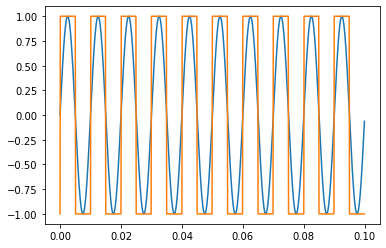

In [21]:
import math
import matplotlib.pyplot as plt
f = 100  #方波頻率
Tf = 1 / f #方波週期
N = 100  #一週期分成幾等分
dt = Tf / N #最小單位時間
M = 10    #指定產生幾週期的波型
totalPoints = M * N #總資料點個數
print(Tf)
w = 2*math.pi*f
T = [i*dt for i in range(totalPoints)]
sin = [math.sin(w*t) for t in T]

#[f(x) if condition else g(x) for x in sequence]
square = [1 if x>0 else -1 for x in sin]
plt.plot(T,sin, T,square)

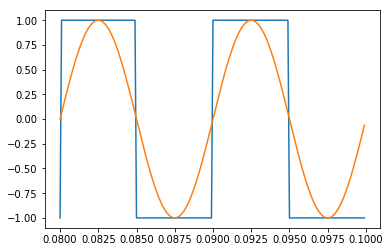

In [19]:
plt.plot(T[-2*N:],square[-2*N:], T[-2*N:], sin[-2*N:])

## 方波輸入RC電路

<img align="center" style="padding-right:10px;" src="figures\RC_circuit2.png">


0.002


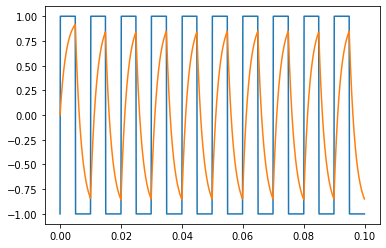

In [26]:
R = 20
C = 100E-6
tau = R*C
print(tau)
totalPoints = len(T)
Vc=[0 for i in range(totalPoints)]
Vi = square.copy()
for n in range(1,totalPoints):
    Vc[n] = Vc[n-1]+(Vi[n]-Vc[n-1])*(1-math.exp(-dt/tau))
plt.plot(T,Vi, T, Vc)

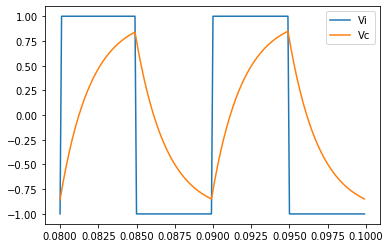

In [27]:
plt.plot(T[-2*N:],Vi[-2*N:],label='Vi')
plt.plot(T[-2*N:], Vc[-2*N:],label='Vc')
plt.legend()

# 使用2~200的電阻值，重試電路，觀察輸出波形的變化，並解釋其原因

## 箝位電路

## 示範: 箝位電路1

<img align="center" style="padding-right:10px;" src="figures\clamper1.png">

提示:
1. $V_i - V_c > 0， D 導通， Vo = 0, V_c = V_i $  
2. $V_i - V_c \leq 0， D 截止， Vo = V_i - V_c, 電容經電容充電$   


3. 電容充電公式  
    $V_c (n) = V_c(n-1) + (V_i (n) - V_c(n-1))(1-e^{-\frac{\Delta}{\tau}})$

0.002


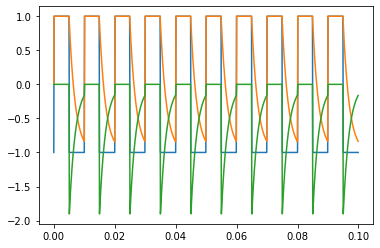

In [6]:
R = 20
C = 100E-6
tau = R*C
print(tau)
totalPoints = len(T)
Vc=[0 for i in range(totalPoints)]
Vo=[0 for i in range(totalPoints)]
Vi = square.copy()
for n in range(1,totalPoints):
    if Vi[n]-Vc[n-1]>0:
        Vo[n] = 0
        Vc[n] = Vi[n]
    else:
        Vc[n] = Vc[n-1]+(Vi[n]-Vc[n-1])*(1-math.exp(-dt/tau))
        Vo[n] = Vi[n] - Vc[n]
plt.plot(T,Vi, T, Vc, T, Vo)

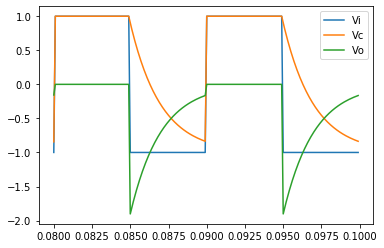

In [7]:
plt.plot(T[-2*N:],Vi[-2*N:],label='Vi')
plt.plot(T[-2*N:], Vc[-2*N:],label='Vc')
plt.plot(T[-2*N:], Vo[-2*N:],label='Vo')
plt.legend()

## 練習: 箝位電路2

<img align="center" style="padding-right:10px;" src="figures\clamper2.png">

提示:(要修正)
1. $V_i - V_c > 0， D 導通， Vo = 0, V_c = V_i $  
2. $V_i - V_c \leq 0， D 截止， Vo = V_i - V_c, 電容經電容充電$   


3. 電容充電公式  
    $V_c (n) = V_c(n-1) + (V_i (n) - V_c(n-1))(1-e^{-\frac{\Delta}{\tau}})$

## 練習: 箝位電路3

<img align="center" style="padding-right:10px;" src="figures\clamper3.png">

提示:(要修正)
1. $V_i - V_c > 0， D 導通， Vo = 0, V_c = V_i $  
2. $V_i - V_c \leq 0， D 截止， Vo = V_i - V_c, 電容經電容充電$   


3. 電容充電公式  
    $V_c (n) = V_c(n-1) + (V_i (n) - V_c(n-1))(1-e^{-\frac{\Delta}{\tau}})$